# Evaluation notebook
This notebook is meant to be executed after 'main.py' and 'main_multiuser.py', since it uses the results stored by those programs for visualisation purposes.
The first cell contains the parameters to be tuned for a correct execution. Here's a quick explanation:
- datapath: string, containing the folder where results have been stored by 'main.py' and 'main_multiuser.py'. Note that results are saved as .txt files;
- subjects: list of integers, containing the different configurations of subjects on which models have been tested;
- model_names: list of strings, containing the names of models that have been deployed.

In [1]:
datapath = "./data/results/"
subjects = [1,2,3,4,23]
model_names = ["Convolutional", "Convolutional1DRecurrent"]

Import useful packeges.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task A

In [3]:
task = "A"
results = np.zeros([3,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (3, 5, 2)
Loading A_Convolutional_1.txt
Loading A_Convolutional_2.txt
Loading A_Convolutional_3.txt
Loading A_Convolutional_4.txt
Loading A_Convolutional_23.txt
Loading A_Convolutional1DRecurrent_1.txt
Loading A_Convolutional1DRecurrent_2.txt
Loading A_Convolutional1DRecurrent_3.txt
Loading A_Convolutional1DRecurrent_4.txt
Loading A_Convolutional1DRecurrent_23.txt


## Results for classification with null class
These results consist of the ones of One-Shot classification, which are stored on the top matrix.

In [4]:
res_A1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A1

,Convolutional,Convolutional1DRecurrent
S1,0.9009,0.8943
S2,0.8277,0.7461
S3,0.8225,0.8090
S4,0.8689,0.8720
S2+S3,0.7805,0.7889


<Figure size 432x288 with 0 Axes>

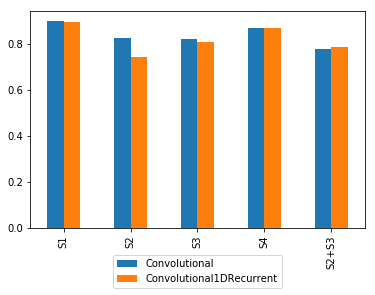

In [5]:
plt.figure()
res_A1.plot(kind='bar', layout="t", logy=False);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

## Results for classification without null class
These results consist of the ones of Two-Steps classification, which are stored on the bottom matrix.

In [6]:
res_A2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)

<Figure size 432x288 with 0 Axes>

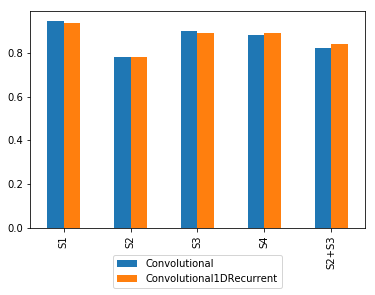

In [7]:
plt.figure()
res_A2.plot(kind='bar', layout="t", logy=False);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

## Comparison between classifications with and without null class

In [8]:
df = pd.concat([res_A1, res_A2], axis=1, keys=["null class", "no null class"])
df

null class                          no null class  \
      Convolutional Convolutional1DRecurrent Convolutional   
S1           0.9009                   0.8943        0.9445   
S2           0.8277                   0.7461        0.7799   
S3           0.8225                   0.8090        0.8998   
S4           0.8689                   0.8720        0.8816   
S2+S3        0.7805                   0.7889        0.8229   

                                
      Convolutional1DRecurrent  
S1                      0.9338  
S2                      0.7790  
S3                      0.8881  
S4                      0.8895  
S2+S3                   0.8377

<Figure size 432x288 with 0 Axes>

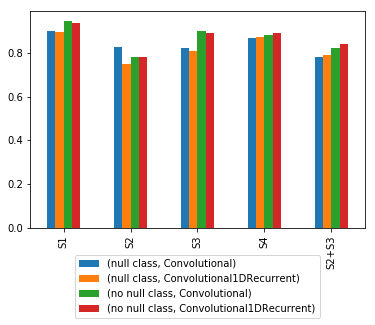

In [9]:
plt.figure()
df.plot(kind='bar', layout="t", logy=False);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

### Results for Convolutional model

In [10]:
res_A3 = pd.DataFrame(results[:,:,0].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification"])
res_A3

,One-Shot Classification,Two-Step Detection,Two-Step Classification
S1,0.9009,0.9490,0.9445
S2,0.8277,0.9506,0.7799
S3,0.8225,0.9361,0.8998
S4,0.8689,0.9672,0.8816
S2+S3,0.7805,0.9390,0.8229


<Figure size 432x288 with 0 Axes>

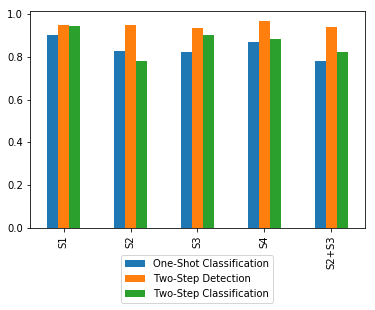

In [11]:
plt.figure()
res_A3.plot(kind='bar', layout="t");
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

### Results for Convolutional1DRecurrent model

In [12]:
res_A4 = pd.DataFrame(results[:,:,1].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification"])
res_A4

,One-Shot Classification,Two-Step Detection,Two-Step Classification
S1,0.8943,0.9603,0.9338
S2,0.7461,0.9432,0.7790
S3,0.8090,0.9089,0.8881
S4,0.8720,0.9729,0.8895
S2+S3,0.7889,0.9278,0.8377


<Figure size 432x288 with 0 Axes>

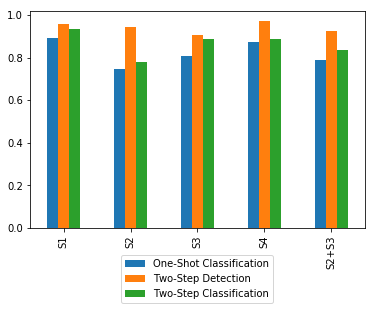

In [13]:
plt.figure()
res_A4.plot(kind='bar', layout="t");
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

# Task B

In [14]:
task = "B"
results = np.zeros([3,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (3, 5, 2)
Loading B_Convolutional_1.txt
Loading B_Convolutional_2.txt
Loading B_Convolutional_3.txt
Loading B_Convolutional_4.txt
Loading B_Convolutional_23.txt
Loading B_Convolutional1DRecurrent_1.txt
Loading B_Convolutional1DRecurrent_2.txt
Loading B_Convolutional1DRecurrent_3.txt
Loading B_Convolutional1DRecurrent_4.txt
Loading B_Convolutional1DRecurrent_23.txt


## Results for classification with null class
These results consist of the ones of One-Shot classification, which are stored on the top matrix.

In [15]:
res_B1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B1

,Convolutional,Convolutional1DRecurrent
S1,0.8743,0.8900
S2,0.8001,0.8105
S3,0.8573,0.8758
S4,0.8458,0.8407
S2+S3,0.8178,0.8329


<Figure size 432x288 with 0 Axes>

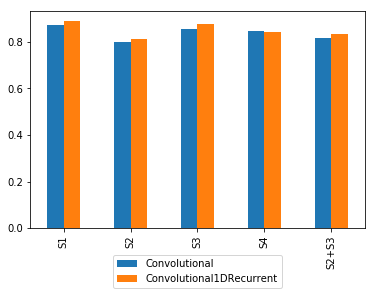

In [16]:
plt.figure()
res_B1.plot(kind='bar', layout="t", logy=False);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

## Results for classification without null class
These results consist of the ones of Two-Steps classification, which are stored on the bottom matrix.

In [17]:
res_B2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B2

,Convolutional,Convolutional1DRecurrent
S1,0.7811,0.7941
S2,0.3284,0.3490
S3,0.7354,0.7559
S4,0.6448,0.6564
S2+S3,0.5627,0.6042


<Figure size 432x288 with 0 Axes>

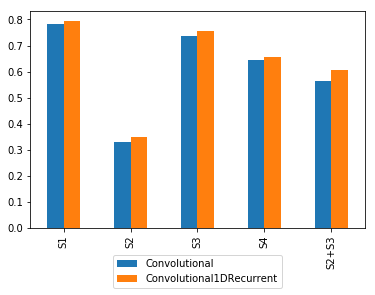

In [18]:
plt.figure()
res_B2.plot(kind='bar', layout="t", logy=False);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

## Comparison between classifications with and without null class

In [19]:
df = pd.concat([res_B1, res_B2], axis=1, keys=["null class", "no null class"])
df

null class                          no null class  \
      Convolutional Convolutional1DRecurrent Convolutional   
S1           0.8743                   0.8900        0.7811   
S2           0.8001                   0.8105        0.3284   
S3           0.8573                   0.8758        0.7354   
S4           0.8458                   0.8407        0.6448   
S2+S3        0.8178                   0.8329        0.5627   

                                
      Convolutional1DRecurrent  
S1                      0.7941  
S2                      0.3490  
S3                      0.7559  
S4                      0.6564  
S2+S3                   0.6042

<Figure size 432x288 with 0 Axes>

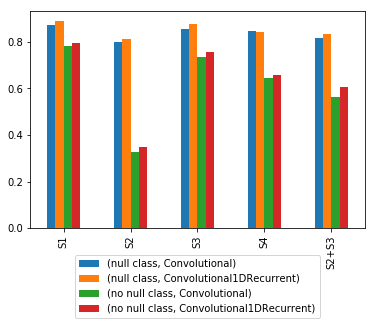

In [20]:
plt.figure()
df.plot(kind='bar', layout="t", logy=False);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [21]:
res_B3 = pd.DataFrame(results[:,:,0].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification"])
res_B3

,One-Shot Classification,Two-Step Detection,Two-Step Classification
S1,0.8743,0.9198,0.7811
S2,0.8001,0.8629,0.3284
S3,0.8573,0.8948,0.7354
S4,0.8458,0.8784,0.6448
S2+S3,0.8178,0.8692,0.5627


<Figure size 432x288 with 0 Axes>

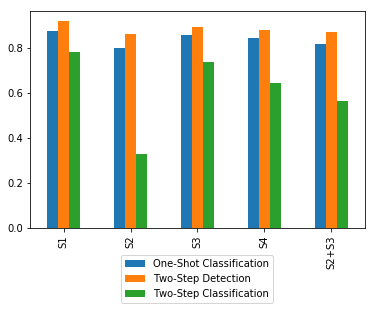

In [22]:
plt.figure()
res_B3.plot(kind='bar', layout="t");
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [23]:
res_B4 = pd.DataFrame(results[:,:,1].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification"])
res_B4

,One-Shot Classification,Two-Step Detection,Two-Step Classification
S1,0.8900,0.9222,0.7941
S2,0.8105,0.8586,0.3490
S3,0.8758,0.8919,0.7559
S4,0.8407,0.8854,0.6564
S2+S3,0.8329,0.8759,0.6042


<Figure size 432x288 with 0 Axes>

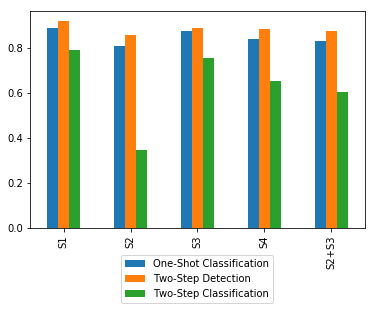

In [24]:
plt.figure()
res_B4.plot(kind='bar', layout="t");
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

# End